In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    final_number: int

In [5]:
def adder(state: AgentState) -> AgentState:
    """This node add 2 numbers"""
    state["final_number"] = state["number1"] + state["number2"]
    return state


def subtractor(state: AgentState) -> AgentState:
    """This node subtract 2 numbers"""
    state["final_number"] = state["number1"] - state["number2"]
    return state


def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next phase of the graph"""
    if state["operation"] == "+":
        return "addition_opertation"
    elif state["operation"] == "-":
        return "subtractor_operation"

In [6]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state)  # passthrough function

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_opertation": "add_node",
        "subtractor_operation": "subtract_node",
    },
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

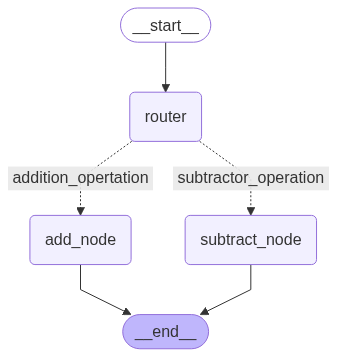

In [7]:
from IPython.display import Image, display

display((Image(app.get_graph().draw_mermaid_png())))

In [8]:
initial_state_1 = AgentState(number1=1, operation="+", number2=2)
print(app.invoke(initial_state_1))

{'number1': 1, 'operation': '+', 'number2': 2, 'final_number': 3}
